In [100]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [101]:
# import warnings
# warnings.filterwarnings('ignore')

In [102]:
data = pd.read_csv('./weatherAUS.csv')

# 1. Analisis exploratorio de datos.

In [103]:
data.shape

(145460, 23)

#### Previsualizacion los datos.

In [104]:
pd.set_option('display.max_columns', None)

In [105]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01/12/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02/12/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03/12/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04/12/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05/12/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [232]:
data.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

Solo las variables Date y Location contienen la totalidad de los datos. 

In [230]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = (df.isnull().sum().sort_values(ascending = False)/len(df)*100)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, round(percent,2)], axis=1, keys=['Total', 'Percent'])

In [231]:
missing_percentage(data)

,Total,Percent
Sunshine,69835,48.01
Evaporation,62790,43.17
Cloud3pm,59358,40.81
Cloud9am,55888,38.42
Pressure9am,15065,10.36
Pressure3pm,15028,10.33
WindDir9am,10566,7.26
WindGustDir,10326,7.10
WindGustSpeed,10263,7.06
Humidity3pm,4507,3.10


In [107]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

##### Propiedades estadísticas del conjunto de datos.

In [108]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


# 2. Analisis univariado.

### Exploracion de la variable objetivo RainTomorrow.

In [109]:
data['RainTomorrow'].isnull().sum()

3267

Hay 3267 valores faltantes en la variable objetivo.

In [110]:
data['RainTomorrow'].nunique()

2

In [111]:
data['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

**Distribución de frecuencia de los valores:**

In [112]:
data['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

**Porcentaje de distribución de frecuencia de valores:**

In [113]:
data['RainTomorrow'].value_counts()/len(data)

RainTomorrow
No     0.758394
Yes    0.219146
Name: count, dtype: float64

**Visualizacion de la distribución de frecuencias de la variable RainTomorrow:**

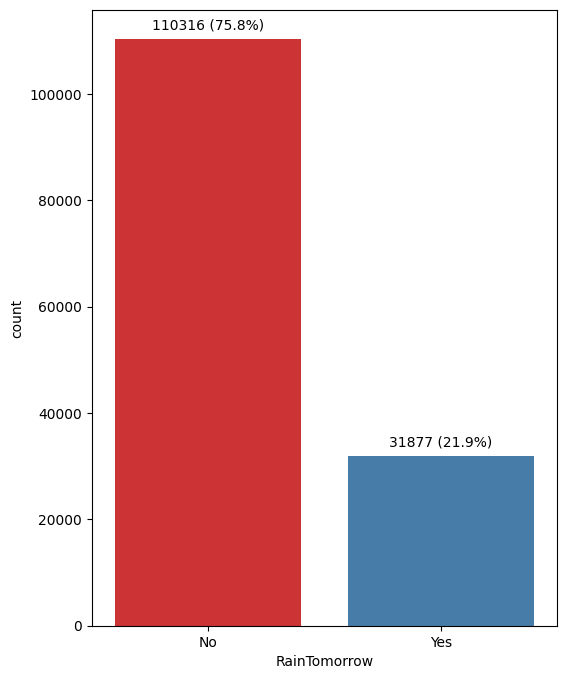

In [114]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", hue="RainTomorrow", data=data, palette="Set1", legend=False)

total = len(data)
for p in ax.patches:
    count = format(p.get_height(), '.0f')
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count} ({percentage})', (x, y), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# 3. Analisis bivariado.

## 3.0 Declaracion de funciones.

In [189]:
def get_dummies(df, column):
    dummies = pd.get_dummies(df[column], drop_first=True, dummy_na=True)
    return dummies

def print_missing_values(df, column, dummies):
    print(f"Summary for column: {column}")
    print(dummies.sum(axis=0))
    
    missing_values = df[column].isnull().sum()
    print(f"Missing values: {missing_values}")
    
    missing_percentage = (missing_values / len(df)) * 100
    print(f"Missing percentage: {round(missing_percentage, 2)}%")

## 3.1 Variables categoricas.

In [240]:
def categorical_columns(df):
    return df.select_dtypes(include=['object']).columns

def print_categoical_columns(data):
    categorical = categorical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in categorical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Categorical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values. \t {data[col].nunique()} unique values.')

In [241]:
print_categoical_columns(data)

Categorical columns:
WindDir9am 	 10566 null values. 	 16 unique values.
WindGustDir 	 10326 null values. 	 16 unique values.
WindDir3pm 	 4228 null values. 	 16 unique values.
RainTomorrow 	 3267 null values. 	 2 unique values.
RainToday 	 3261 null values. 	 2 unique values.
Location 	 0 null values. 	 49 unique values.


In [242]:
data[categorical_columns(data).values].sample(10)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
102323,MountGambier,WSW,SW,SW,Yes,No
53850,MountGinini,SW,NNE,WSW,No,No
52326,MountGinini,WNW,W,NaN,Yes,Yes
5966,BadgerysCreek,S,SSW,SSW,Yes,Yes
29197,Richmond,ENE,SSW,ESE,Yes,No
133382,Launceston,WNW,SSE,NW,No,No
118831,PerthAirport,ENE,NE,WSW,No,No
75074,Portland,W,W,SW,Yes,No
139016,AliceSprings,SE,E,ESE,No,No
10852,CoffsHarbour,NE,NNW,NE,No,No


De las variables categorias, 2 de ellas son binarias: RainToday y RainTomorrow (variable objetivo).

### Exploracion de variables categóricas.

**Recuento de frecuencia de variables categóricas.**

In [125]:
for var in data[categorical_columns(data).values]:     
    print(data[var].value_counts())

Date
12/11/2013    49
01/09/2014    49
23/08/2014    49
24/08/2014    49
25/08/2014    49
              ..
29/11/2007     1
28/11/2007     1
27/11/2007     1
26/11/2007     1
31/01/2008     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

Distribución de frecuencias de las variables categóricas:

In [126]:
for var in data[categorical_columns(data).values]:    
    print(data[var].value_counts()/np.float64(len(data)))

Date
12/11/2013    0.000337
01/09/2014    0.000337
23/08/2014    0.000337
24/08/2014    0.000337
25/08/2014    0.000337
                ...   
29/11/2007    0.000007
28/11/2007    0.000007
27/11/2007    0.000007
26/11/2007    0.000007
31/01/2008    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

### Cardinalidad.

Analisis de variables que puedan tener alta cardinalidad.

In [135]:
max_length = max(len(var) for var in data[categorical_columns(data).values])

for var in data[categorical_columns(data).values]:    
    print(f'{var.ljust(max_length)} \t{len(data[var].unique())} labels.')

Location     	49 labels.
WindGustDir  	17 labels.
WindDir9am   	17 labels.
WindDir3pm   	17 labels.
RainToday    	3 labels.
RainTomorrow 	3 labels.


### 3.1.1 Variable Date.

Extraccion de valores Year, Month, and Day de la variable Date en nuevas columnas.

In [128]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [130]:
data.drop('Date', axis=1, inplace = True)

In [131]:
print_categoical_columns(data)

Categorical columns:
Location 	 0 null values. 	 49 unique values.
WindGustDir 	 10326 null values. 	 16 unique values.
WindDir9am 	 10566 null values. 	 16 unique values.
WindDir3pm 	 4228 null values. 	 16 unique values.
RainToday 	 3261 null values. 	 2 unique values.
RainTomorrow 	 3267 null values. 	 2 unique values.


In [132]:
data.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
133777,Launceston,10.1,16.1,0.0,NaN,NaN,W,44.0,WNW,NNW,4.0,19.0,80.0,95.0,1000.7,996.8,NaN,NaN,13.6,15.2,No,Yes,2010,12,17
87981,Cairns,24.3,28.5,6.4,3.4,0.5,S,30.0,SE,S,7.0,9.0,81.0,92.0,1004.9,1002.9,7.0,7.0,27.3,24.6,Yes,Yes,2011,1,21
19021,NorahHead,9.0,18.3,0.0,NaN,NaN,NNW,20.0,WNW,E,9.0,6.0,64.0,65.0,1020.3,1019.1,NaN,NaN,13.8,15.4,No,No,2011,7,26
72419,Mildura,6.4,24.9,0.0,6.6,12.3,E,26.0,E,N,17.0,6.0,50.0,23.0,1026.5,1023.6,0.0,0.0,13.6,23.0,No,No,2014,10,17
42155,Williamtown,5.0,18.0,0.0,16.0,NaN,NW,33.0,NW,SSE,28.0,17.0,62.0,52.0,1025.8,1024.0,NaN,NaN,10.0,17.3,No,No,2016,5,30
64256,MelbourneAirport,11.7,21.0,0.0,3.4,6.4,SW,33.0,W,SSE,13.0,26.0,63.0,54.0,1016.5,1015.9,7.0,7.0,15.2,19.0,No,No,2009,3,7
100205,MountGambier,3.8,15.2,0.0,3.8,2.3,WSW,22.0,NE,SW,4.0,17.0,55.0,52.0,1025.3,1023.6,7.0,7.0,11.4,14.3,No,No,2010,10,24
143877,Katherine,15.4,31.5,0.0,3.6,NaN,ESE,43.0,ESE,ESE,17.0,22.0,70.0,NaN,1016.6,1012.7,0.0,NaN,21.6,NaN,No,No,2017,6,21
80049,Watsonia,14.3,29.8,0.0,14.4,0.2,N,65.0,NNE,SW,19.0,13.0,22.0,37.0,1006.8,1005.2,8.0,8.0,26.7,26.9,No,Yes,2014,11,20
113369,Witchcliffe,15.7,34.5,0.0,NaN,NaN,SSE,43.0,SE,SSE,13.0,22.0,58.0,41.0,1010.6,1007.3,NaN,NaN,24.3,32.5,No,No,2014,1,22


### 3.1.2 Variable Location.

Distribución de frecuencia de los valores en la variable Location.

In [149]:
data.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [201]:
# One Hot Encoding.
dummies = get_dummies(data, 'Location')
dummies.sample(10)

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,MountGinini,Newcastle,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Penrith,Perth,PerthAirport,Portland,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,NaN
22730,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
130893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
71469,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
12817,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
41091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
102508,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
23692,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
103072,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
51039,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
49715,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [202]:
print_missing_values(data, 'Location', dummies)

Summary for column: Location
Albany              3040
Albury              3040
AliceSprings        3040
BadgerysCreek       3009
Ballarat            3040
Bendigo             3040
Brisbane            3193
Cairns              3040
Canberra            3436
Cobar               3009
CoffsHarbour        3009
Dartmoor            3009
Darwin              3193
GoldCoast           3040
Hobart              3193
Katherine           1578
Launceston          3040
Melbourne           3193
MelbourneAirport    3009
Mildura             3009
Moree               3009
MountGambier        3040
MountGinini         3040
Newcastle           3039
Nhil                1578
NorahHead           3004
NorfolkIsland       3009
Nuriootpa           3009
PearceRAAF          3009
Penrith             3039
Perth               3193
PerthAirport        3009
Portland            3009
Richmond            3009
Sale                3009
SalmonGums          3001
Sydney              3344
SydneyAirport       3009
Townsville          3

### 3.1.3 Variable de WindGustDir.

In [184]:
data.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [203]:
# One Hot Encoding
dummies = get_dummies(data, 'WindGustDir')
dummies.sample(10)

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
44108,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
16611,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
30459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2204,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
36370,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
127858,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
45141,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
139640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
144322,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
81038,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [204]:
print_missing_values(data, 'WindGustDir', dummies)

Summary for column: WindGustDir
ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64
Missing values: 10326
Missing percentage: 7.1%


### 3.1.4 Variable de WindDir9am.

In [214]:
columm = 'WindDir9am'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: WindDir9am
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64
Missing values: 10566
Missing percentage: 7.26%


### 3.1.4 Variable de WindDir3pm.

In [215]:
columm = 'WindDir3pm'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: WindDir3pm
ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64
Missing values: 4228
Missing percentage: 2.91%


### 3.1.4 Variable de RainToday.

In [216]:
columm = 'RainToday'
print_missing_values(data, columm, get_dummies(data, columm))

Summary for column: RainToday
Yes    31880
NaN     3261
dtype: int64
Missing values: 3261
Missing percentage: 2.24%


## 3.2 Variables numericas.

In [238]:
def numerical_columns(df):
    return df.select_dtypes(include=['float64', 'int64']).columns

def print_numerical_columns(data):
    numerical = numerical_columns(data)
    null_counts = {col: data[col].isnull().sum() for col in numerical}
    sorted_columns = sorted(null_counts.items(), key=lambda x: x[1], reverse=True)
    
    print('Numerical columns:')
    for col, null_count in sorted_columns:
        print(f'{col} \t {null_count} null values.')

In [239]:
print_numerical_columns(data)

Numerical columns:
Sunshine 	 69835 null values.
Evaporation 	 62790 null values.
Cloud3pm 	 59358 null values.
Cloud9am 	 55888 null values.
Pressure9am 	 15065 null values.
Pressure3pm 	 15028 null values.
WindGustSpeed 	 10263 null values.
Humidity3pm 	 4507 null values.
Temp3pm 	 3609 null values.
Rainfall 	 3261 null values.
WindSpeed3pm 	 3062 null values.
Humidity9am 	 2654 null values.
WindSpeed9am 	 1767 null values.
Temp9am 	 1767 null values.
MinTemp 	 1485 null values.
MaxTemp 	 1261 null values.


In [244]:
data[numerical_columns(data).values].sample(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
57919,7.5,16.8,0.4,NaN,NaN,35.0,15.0,20.0,96.0,72.0,1019.4,1019.8,8.0,8.0,10.3,14.0
31844,12.0,19.1,0.2,3.2,3.8,33.0,13.0,26.0,51.0,63.0,1022.1,1020.0,2.0,6.0,15.0,16.8
116036,17.6,27.2,0.2,NaN,12.7,50.0,33.0,31.0,41.0,32.0,1016.0,1014.6,4.0,0.0,21.1,25.5
104953,9.0,20.5,0.0,7.8,9.3,43.0,20.0,20.0,73.0,49.0,1023.1,1022.1,8.0,NaN,13.0,18.9
98807,7.8,13.7,0.0,NaN,NaN,50.0,13.0,20.0,47.0,46.0,1020.9,1014.7,NaN,NaN,11.3,13.2
50178,13.8,20.8,84.2,NaN,NaN,48.0,0.0,9.0,100.0,100.0,1006.7,1000.8,NaN,NaN,14.8,19.2
87941,24.0,30.8,1.0,6.6,1.8,39.0,11.0,19.0,75.0,74.0,1007.6,1004.1,7.0,7.0,27.2,30.3
14025,2.6,22.4,0.0,13.4,9.5,35.0,13.0,24.0,57.0,17.0,1026.8,1022.3,3.0,6.0,13.0,21.9
113676,9.7,25.4,0.0,NaN,NaN,44.0,15.0,28.0,51.0,53.0,1021.4,1018.5,NaN,NaN,18.9,23.1
129478,10.4,17.6,0.0,NaN,NaN,35.0,19.0,13.0,82.0,82.0,1026.5,1024.3,NaN,NaN,13.0,15.1


Todas las variables numéricas son de tipo continuo.

## 3.1 Inspeccion de valores atipicos.

In [248]:
print(round(data[numerical_columns(data).values].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Las columnas Rainfall, Evaporation, WindSpeed9am y WindSpeed3pm pueden contener valores atípicos.

### 3.1.1 Diagramas boxplot y QQ-Plot

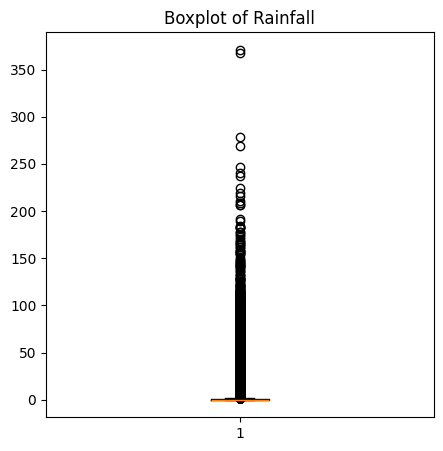

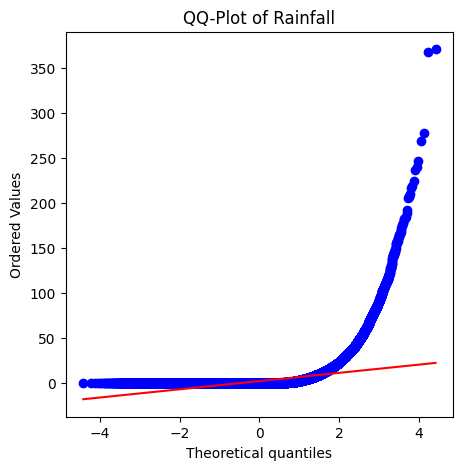

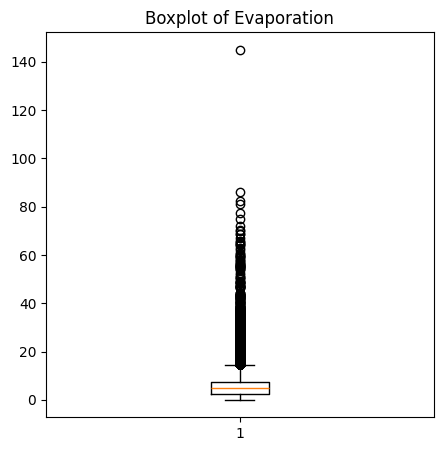

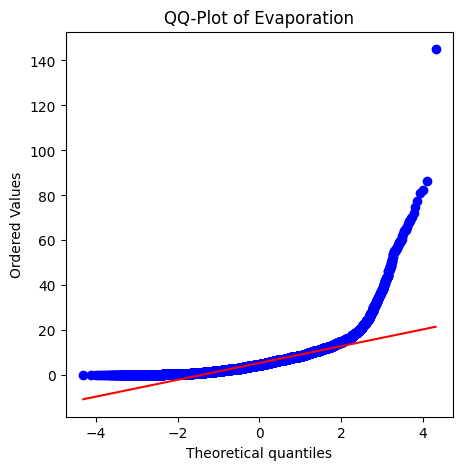

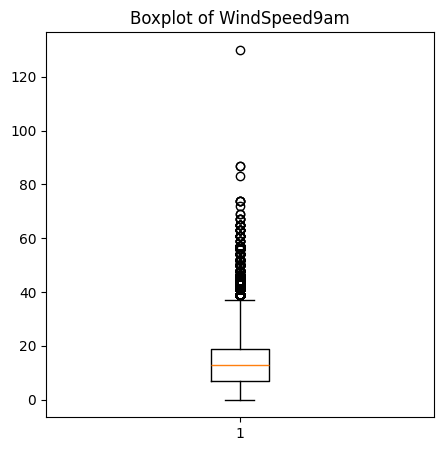

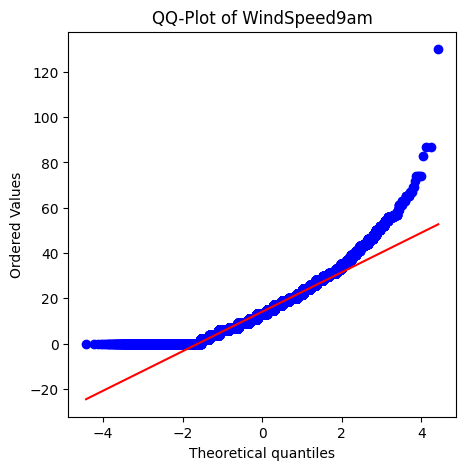

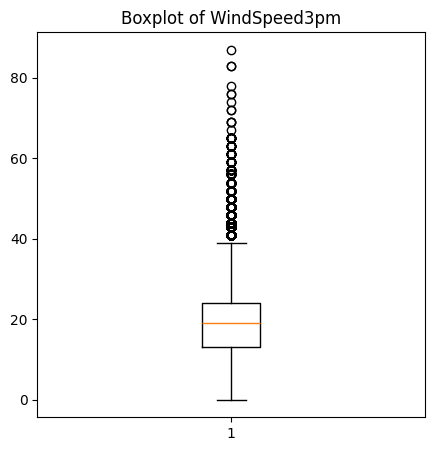

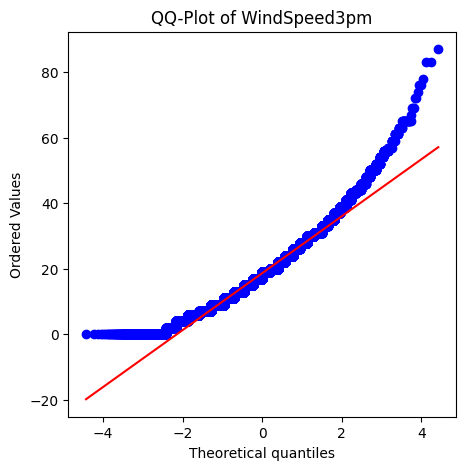

In [250]:
import matplotlib.pyplot as plt
import scipy.stats as stats

def draw_boxplot(df, column):
    plt.figure(figsize=(5, 5))
    plt.boxplot(df[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.show()

def draw_qqplot(df, column):
    plt.figure(figsize=(5, 5))
    stats.probplot(df[column].dropna(), dist="norm", plot=plt)
    plt.title(f'QQ-Plot of {column}')
    plt.show()

columns = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']
for col in columns:
    draw_boxplot(data, col)
    draw_qqplot(data, col)